In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('titanic.csv')

In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [8]:
sex_ = {'male':1, 'female':0}
data['Sex'].replace(sex_, inplace=True)
embarked_ = {'C':1, 'Q': 2, 'S': 3}
data['Embarked'].replace(embarked_, inplace=True)

In [9]:
print(data.isnull().sum())

data['Age'] = data['Age'].fillna(data['Age'].mean()).astype(int)
data.dropna(inplace=True)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [10]:
data.shape

(889, 8)

In [11]:
data['Age'].value_counts()
data = data[(data['Age'] > 0) & (data['Age'] <= 100)]

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve

In [13]:
y = data['Survived']
X = data.drop(labels=['Survived'], axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

In [15]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
600,2,0,24,2,1,27.0000,3.0
520,1,0,30,0,0,93.5000,3.0
450,2,1,36,1,2,27.7500,3.0
820,1,0,52,1,1,93.5000,3.0
773,3,1,29,0,0,7.2250,1.0
...,...,...,...,...,...,...,...
108,3,1,38,0,0,7.8958,3.0
272,2,0,41,0,1,19.5000,3.0
869,3,1,4,1,1,11.1333,3.0
438,1,1,64,1,4,263.0000,3.0


In [16]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [17]:
estimate = clf.predict(X_test)

In [18]:
print((y_test - estimate).mean())
print((y_test - estimate).std())

-0.013574660633484163
0.4906363030804509


In [19]:
accuracy_score(y_test, estimate, normalize=True, sample_weight=None)

0.7601809954751131

In [20]:
import matplotlib.pyplot as plt

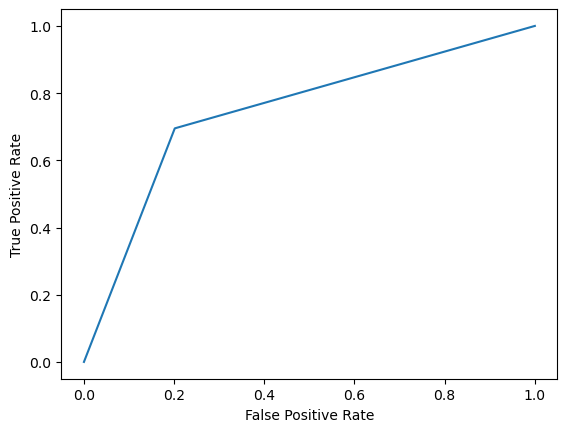

In [22]:
fpr, tpr, _ = roc_curve(y_test, estimate)

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

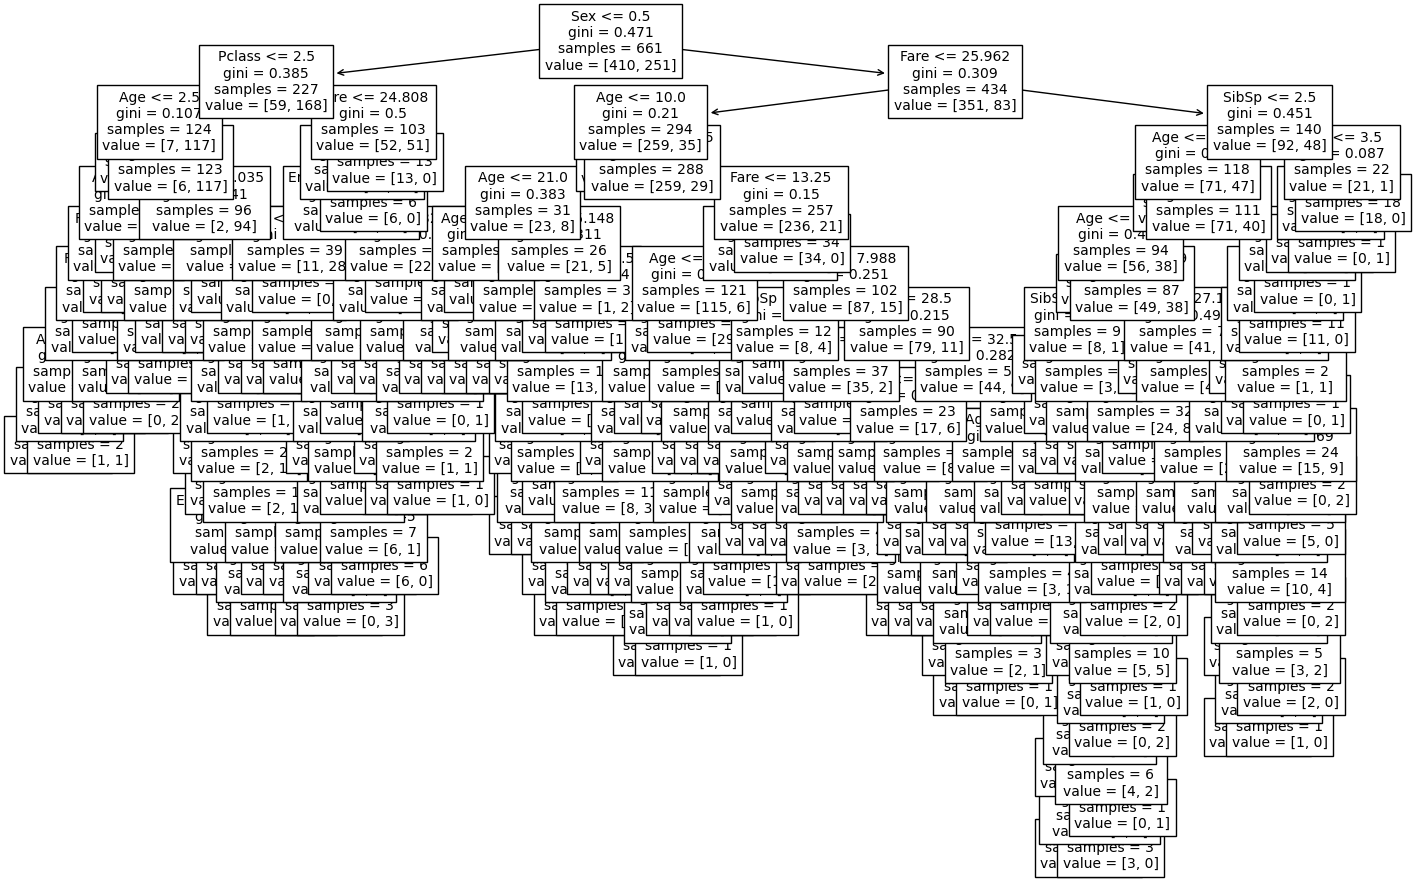

In [23]:
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

In [24]:
clf_b = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, min_samples_split=0.1)
clf_b = clf_b.fit(X_train, y_train)
estimate_b = clf_b.predict(X_test)
true = y_test
print(abs(estimate_b - true).mean())
print((y_test - estimate_b).std())

0.17194570135746606
0.41312287029965244


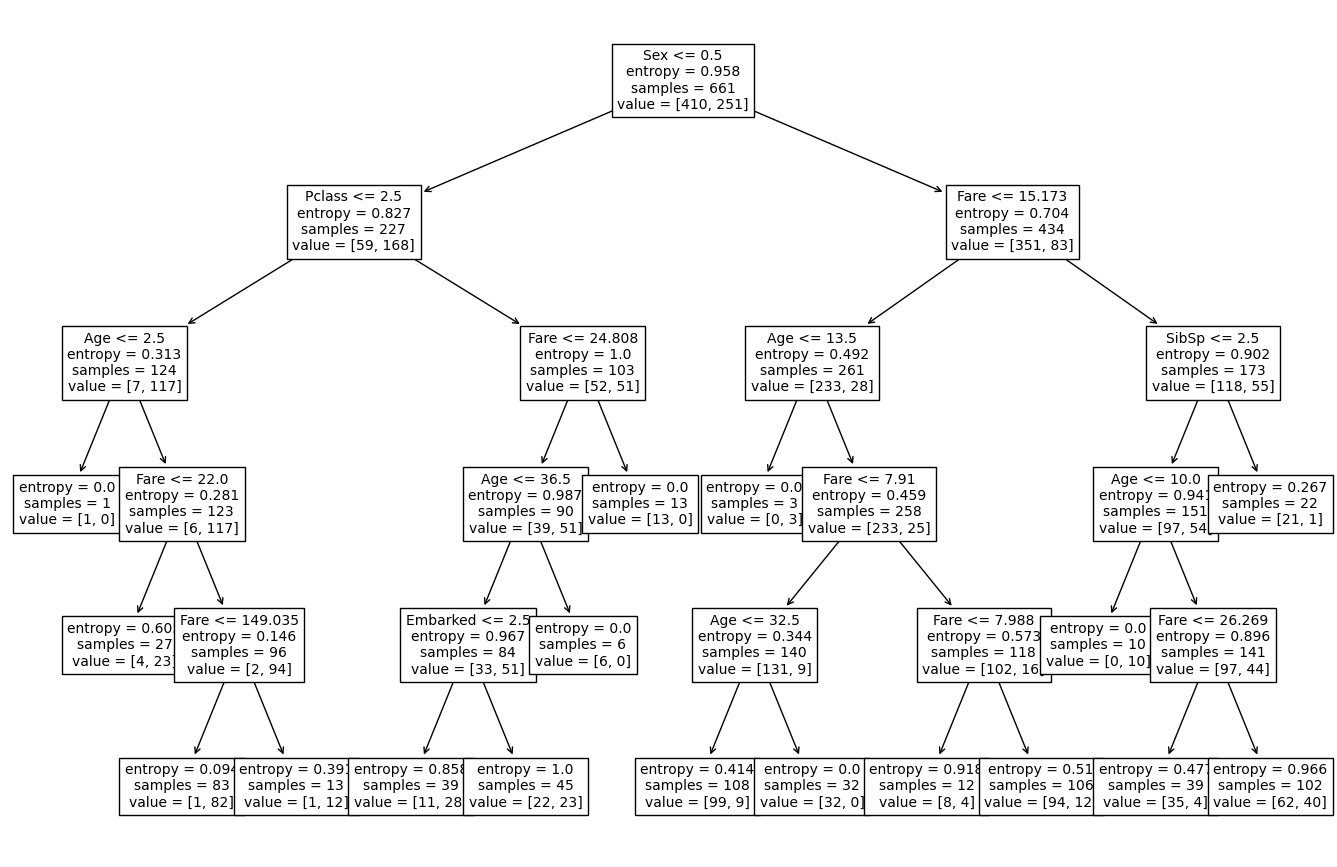

In [25]:
plt.figure(figsize=(17,11))
plot_tree(clf_b, feature_names = list(X_train.columns), fontsize=10)
plt.show()